In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import copy

In [509]:
## Reading Data and removing duplicates
file=pd.ExcelFile('population.xlsx')
df=file.parse('Dataset',skiprows=2)
df=df.drop_duplicates()     
df_new=copy.deepcopy(df)

### Removing Duplicates if any

In [510]:
## Bining The "Age" in bins of different sizes both Inclusive

df["Bin_Age_5"]=df["Age"]
bins = range(0,95,5)
labels=[str(bins[i])+'-'+str(bins[i+1]-1) for i in range(len(bins)-1)]
labels.append('90+')
df.Bin_Age_5=df.Bin_Age_5.replace('90+',91)
df.Bin_Age_5=df.Bin_Age_5.astype('int32')
df['Bin_Age_5'] = pd.cut(df['Bin_Age_5'],right=False,labels=labels,bins=np.r_[bins, np.inf])


df["Bin_Age_W"]=df["Age"]
bins =[0,16,64]
labels=[str(bins[i])+'-'+str(bins[i+1]-1) for i in range(len(bins)-1)]
labels.append('65+')
df.Bin_Age_W=df.Bin_Age_W.replace('90+',91)
df.Bin_Age_W=df.Bin_Age_W.astype('int32')
df['Bin_Age_W'] = pd.cut(df['Bin_Age_W'],right=False,labels=labels,bins=np.r_[bins, np.inf])


df["Age_Category"]=df["Age"]
bins =[0,16,64]
labels=['Children','Working','Old']
df.Age_Category=df.Age_Category.replace('90+',91)
df.Age_Category=df.Age_Category.astype('int32')
df['Age_Category'] = pd.cut(df['Age_Category'],right=False,labels=labels,bins=np.r_[bins, np.inf])


In [511]:
## Descriptive Statistics
df.describe()
## The Median is far off from the Mean
## Huge difference in the 75%ile and Maximum Value.
## Reason: Both Granular Data and Aggregated Data records present in the dataset.
## For instance: United Kingdom-(Scotland, Wales, Northern Ireland and England) and Individual breakdown, Each countries and their counties, cities, towns
## Main problem with this data is that all levels of granularity are present: Group of Countries-Alliances, Countries, Counties, Cities, Division of Cities, Towns.


,2013,2014,2015,2016
count,120120.000000,120120.000000,120120.000000,120120.000000
mean,6636.276057,6687.961122,6741.755261,6798.140909
std,46218.249761,46527.075036,46868.299221,47215.326790
min,0.000000,2.000000,0.000000,0.000000
25%,580.000000,585.000000,589.000000,594.000000
50%,978.000000,986.000000,995.000000,1003.000000
75%,1879.000000,1893.000000,1905.000000,1921.000000
max,946543.000000,946383.000000,946132.000000,945494.000000


In [579]:
#df['Geography code']
Scotland=df[(df['Geography code'].astype(str).str[0]=='S') & (Scotland['Geography']!='Scotland')]
Northern_Ireland=df[(df['Geography code'].astype(str).str[0]=='N') &(Northern_Ireland['Geography']!='Northern Ireland')]
England=df[(df['Geography code'].astype(str).str[0]=='E') & (England['Geography']!='England')]
Wales=df[(df['Geography code'].astype(str).str[0]=='W')&(Wales['Geography']!='Wales')]
Grouped_Countries=df[df['Geography code'].astype(str).str[0]=='K']

In [580]:
### Analysis for Scotland


In [581]:
Scotland.groupby(['Geography']).sum().shape ## Validates there are 32 councils in Scotland

(32, 4)

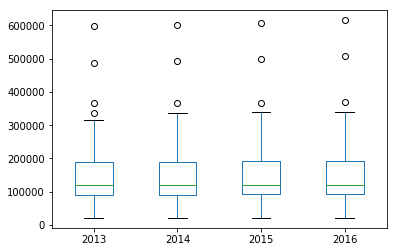

In [582]:
Scotland[(Scotland['Sex']=='All') ].groupby(['Geography']).sum().plot(kind='box')

In [583]:
## Detecting Outliers based on Z-Score
temp1=Scotland[ (Scotland['Sex']=='All') ].groupby(['Geography']).sum()
temp2=temp1.apply(zscore)
temp2.columns=['Z(2013)','Z(2014)','Z(2015)','Z(2016)']
temp1=pd.merge(temp1,temp2,on='Geography')
print('Abnormally Populated Scotland Geography in 2013: \n' + str(temp1[(temp1['Z(2013)']>=2.) | (temp1['Z(2013)']<=-2.)][['2013','2014','2015','2016']]))
print('\nAbnormally Populated Scotland Geography in 2014: \n' + str(temp1[(temp1['Z(2014)']>=2.) | (temp1['Z(2014)']<=-2.)][['2013','2014','2015','2016']]))
print('\nAbnormally Populated Scotland Geography in 2015: \n' + str(temp1[(temp1['Z(2015)']>=2.) | (temp1['Z(2015)']<=-2.)][['2013','2014','2015','2016']]))
print('\nAbnormally Populated Scotland Geography in 2016: \n' + str(temp1[(temp1['Z(2016)']>=2.) | (temp1['Z(2016)']<=-2.)][['2013','2014','2015','2016']]))


## The Numbers are unrealistic: The population changed drastically (fluctuated) from 2013 to 2016 for all the grographies given
## Reasons: Migration, Large Mortality Rate


Abnormally Populated Scotland Geography in 2013: 
                     2013    2014    2015    2016
Geography                                        
East Renfrewshire  487460  492610   92940   93810
Highland           596520  599640  234110  234770

Abnormally Populated Scotland Geography in 2014: 
                     2013    2014    2015    2016
Geography                                        
East Renfrewshire  487460  492610   92940   93810
Highland           596520  599640  234110  234770

Abnormally Populated Scotland Geography in 2015: 
                     2013    2014    2015    2016
Geography                                        
City of Edinburgh   51280   51190  498810  507170
Glasgow City       366900  367250  606340  615070

Abnormally Populated Scotland Geography in 2016: 
                     2013    2014    2015    2016
Geography                                        
City of Edinburgh   51280   51190  498810  507170
Glasgow City       366900  367250  606340  6150

In [ ]:
## Analysis For Northern Ireland

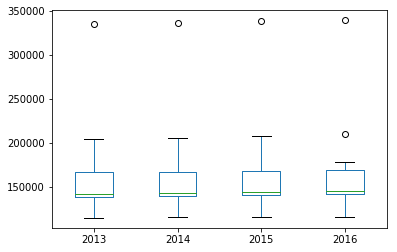

In [584]:
Northern_Ireland[(Northern_Ireland['Sex']=='All') ].groupby(['Geography']).sum().plot(kind='box')

In [585]:
Northern_Ireland[(Northern_Ireland['Sex']=='All') ].groupby(['Geography']).sum().shape

(11, 4)

In [586]:
## Detecting Outliers based on Z-Score
temp1=Northern_Ireland[(Northern_Ireland['Sex']=='All') ].groupby(['Geography']).sum()
temp2=temp1.apply(zscore)
temp2.columns=['Z(2013)','Z(2014)','Z(2015)','Z(2016)']
temp1=pd.merge(temp1,temp2,on='Geography')
print('Abnormally Populated N.I. Geography in 2013: \n' + str(temp1[(temp1['Z(2013)']>=2.) | (temp1['Z(2013)']<=-2.)][['2013','2014','2015','2016']]))
print('\nAbnormally Populated N.I. Geography in 2014: \n' + str(temp1[(temp1['Z(2014)']>=2.) | (temp1['Z(2014)']<=-2.)][['2013','2014','2015','2016']]))
print('\nAbnormally Populated N.I. Geography in 2015: \n' + str(temp1[(temp1['Z(2015)']>=2.) | (temp1['Z(2015)']<=-2.)][['2013','2014','2015','2016']]))
print('\nAbnormally Populated N.I. Geography in 2016: \n' + str(temp1[(temp1['Z(2016)']>=2.) | (temp1['Z(2016)']<=-2.)][['2013','2014','2015','2016']]))


## The Numbers are unrealistic: The population went from 51280 to 498810 from 2013 and 2016 for all of them
## Reasons: Migration, Large Mortality Rate


Abnormally Populated N.I. Geography in 2013: 
             2013    2014    2015    2016
Geography                                
Belfast    335133  142303  338907  339579

Abnormally Populated N.I. Geography in 2014: 
                                        2013    2014    2015    2016
Geography                                                           
Armagh City, Banbridge and Craigavon  203757  336830  207797  210260

Abnormally Populated N.I. Geography in 2015: 
             2013    2014    2015    2016
Geography                                
Belfast    335133  142303  338907  339579

Abnormally Populated N.I. Geography in 2016: 
             2013    2014    2015    2016
Geography                                
Belfast    335133  142303  338907  339579


In [605]:
## Analysis for Wales

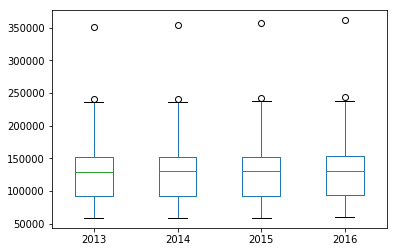

In [606]:
Wales[(Wales['Geography']!='Wales') & (Wales['Sex']=='All') ].groupby(['Geography']).sum().plot(kind='box')

In [608]:
Wales[(Wales['Sex']=='All') ].groupby(['Geography']).sum().shape

(22, 4)

In [609]:
temp1=Wales[(Wales['Sex']=='All') ].groupby(['Geography']).sum()
temp2=temp1.apply(zscore)
temp2.columns=['Z(2013)','Z(2014)','Z(2015)','Z(2016)']
temp1=pd.merge(temp1,temp2,on='Geography')
print('Abnormally Populated Wales Geography in 2013: \n' + str(temp1[(temp1['Z(2013)']>=2.) | (temp1['Z(2013)']<=-2.)][['2013','2014','2015','2016']]))
print('\nAbnormally Populated Wales Geography in 2014: \n' + str(temp1[(temp1['Z(2014)']>=2.) | (temp1['Z(2014)']<=-2.)][['2013','2014','2015','2016']]))
print('\nAbnormally Populated Wales Geography in 2015: \n' + str(temp1[(temp1['Z(2015)']>=2.) | (temp1['Z(2015)']<=-2.)][['2013','2014','2015','2016']]))
print('\nAbnormally Populated Wales Geography in 2016: \n' + str(temp1[(temp1['Z(2016)']>=2.) | (temp1['Z(2016)']<=-2.)][['2013','2014','2015','2016']]))


Abnormally Populated Wales Geography in 2013: 
                     2013    2014    2015    2016
Geography                                        
Rhondda Cynon Taf  351710  354294  237411  238306

Abnormally Populated Wales Geography in 2014: 
                     2013    2014    2015    2016
Geography                                        
Rhondda Cynon Taf  351710  354294  237411  238306

Abnormally Populated Wales Geography in 2015: 
             2013    2014    2015    2016
Geography                                
Cardiff    127159  127685  357160  361468

Abnormally Populated Wales Geography in 2016: 
             2013    2014    2015    2016
Geography                                
Cardiff    127159  127685  357160  361468


In [610]:
## Analysis for England

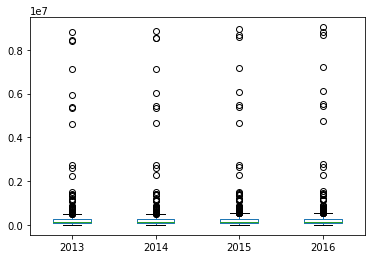

In [611]:
England[(England['Sex']=='All') ].groupby(['Geography']).sum().plot(kind='box')

In [628]:
## Detecting those Sub Regions in England
temp1=England[(England['Sex']=='All') ].groupby(['Geography']).sum()
temp2=temp1.apply(zscore)
temp2.columns=['Z(2013)','Z(2014)','Z(2015)','Z(2016)']
temp1=pd.merge(temp1,temp2,on='Geography')
england_parts=temp1[(temp1['Z(2013)']>=2.) | (temp1['Z(2013)']<=-2.)][['2013','2014','2015','2016']].sort_values(by=['2013'],ascending=False).index.tolist()
england_parts.remove('Greater Manchester')  ### Removed because its not the official sub division and also a city
temp1[(temp1['Z(2013)']>=2.) | (temp1['Z(2013)']<=-2.)][['2013','2014','2015','2016']].sort_values(by=['2013'],ascending=False)
## Realization: England is divided in 9 official regions
## Greater Manchester is the only city in the following List. Rest are official nine regions of England

,2013,2014,2015,2016
Geography,,,,
South East,8792766,8873818,8947913,9026297
West Midlands,8458187,8521640,8584557,8665659
London,8416543,8538689,8673713,8787892
North West,7103261,7132991,7173835,7219623
East of England,5954316,6018383,6076451,6130542
South West,5377596,5423303,5471180,5515953
Yorkshire and The Humber,5337711,5360027,5390576,5425741
East Midlands,4598431,4637413,4677038,4724437
Greater Manchester,2714944,2732854,2756162,2782141


In [629]:
England_sub=England[England['Geography'].isin(england_parts)]
England_new=England[~England['Geography'].isin(england_parts)]

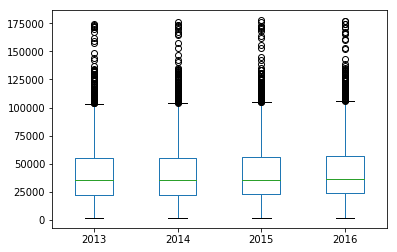

In [634]:
England_sub.plot(kind='box')

## The outliers here are because of "Age", where some regions have uneven population by age 

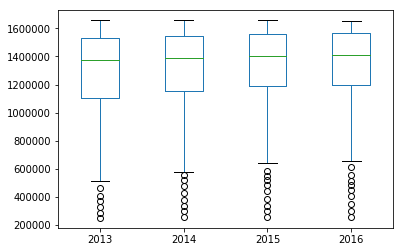

In [651]:
England_sub.groupby(['Age']).sum().plot(kind='box')
## Some Age Categories have less population than normal.
## Can be obtained again by z-scores
## large working population than old(65+) in every part of england from the data

In [662]:
temp=England_sub.groupby(['Age']).sum().apply(zscore)
temp[(temp['2013']>2.) | (temp['2013']<-2.)]
## In the above diagram: It is apparent with negative z-score values less than -2, Across England, People above age 83 and less than 90 are less in number (statistically)

,2013,2014,2015,2016
Age,,,,
84,-2.109263,-2.095839,-2.113620,-2.149178
85,-2.244440,-2.243814,-2.233470,-2.254175
86,-2.349248,-2.378641,-2.382112,-2.377405
87,-2.454926,-2.486979,-2.516337,-2.524560
88,-2.568775,-2.593274,-2.625386,-2.657771
89,-2.671836,-2.705433,-2.730845,-2.765252


In [669]:
England_sub.groupby(['Geography','Age']).sum().describe()

,2013,2014,2015,2016
count,819.000000,819.000000,819.000000,819.000000
mean,138337.709402,139499.326007,140707.897436,141960.908425
std,64289.256164,64561.285188,64980.871637,65260.838018
min,11250.000000,11708.000000,11678.000000,11528.000000
25%,88541.000000,90043.000000,91611.000000,95904.000000
50%,133794.000000,134716.000000,135120.000000,135686.000000
75%,183075.000000,184000.000000,185905.000000,187829.000000
max,347760.000000,352648.000000,355320.000000,353824.000000


In [667]:
England_sub.groupby(['Geography','Age']).sum()

2013    2014    2015    2016
Geography                Age                                
East Midlands            0    108124  105836  106738  107814
                         1    112920  109666  107626  108684
                         10    97912  102040  102974  109412
                         11    96712   98694  102884  103790
                         12    99946   97312   99436  103810
                         13   103422  100550   98006  100246
                         14   108740  104254  101510   99028
                         15   108478  109364  104976  102438
                         16   111416  109080  109940  105850
                         17   112196  112268  109758  110994
                         18   114932  115098  115494  112886
                         19   128222  125920  125934  128142
                         2    112576  114548  111456  109350
                         20   131504  132772  130726  131062
                         21   132248  130434  132926  130102
                         22   130748  129708  128280  130888
                         23   124456  127674  127292  126000
                         24   117354  122314  126488  126176
                         25   115536  117282  122206  126596
                         26   111166  115912  117610  122526
                         27   112640  111820  116778  118098
                         28   112496  113376  112458  117930
                         29   110592  113770  114658  113908
                         3    110702  113952  116242  113150
                         30   111300  111626  114622  115874
                         31   110522  112390  112640  115870
                         32   113732  111440  113502  113930
                         33   114618  114736  112268  115008
                         34   109654  115462  115462  113464
                         35   102010  110384  116452  116696
...                              ...     ...     ...     ...
Yorkshire and The Humber 64   123626  119464  116726  113822
                         65   131068  122560  118380  115556
                         66   142856  129764  121298  117200
                         67   108054  141282  128194  120082
                         68   105952  106510  139628  126666
                         69   104148  104512  105006  137664
                         7    127796  129302  133534  134410
                         70    95990  102454  103070  103458
                         71    85834   94346  100792  101268
                         72    78998   84064   92662   98950
                         73    82662   77314   82308   90666
                         74    81790   80748   75368   80210
                         75    80398   79600   78650   73358
                         76    76080   78118   77098   76440
                         77    72070   73514   75534   74448
                         78    68068   69500   70882   72772
                         79    63028   65332   66682   68024
                         8    122258  128154  129760  134082
                         80    58536   60300   62232   63578
                         81    55434   55650   57158   59092
                         82    52588   52274   52358   53796
                         83    48024   49134   48676   48808
                         84    43112   44496   45450   45228
                         85    38278   39458   40746   41716
                         86    34834   34802   35572   36928
                         87    30840   31332   31018   31948
                         88    26322   27410   27410   27292
                         89    22992   23018   23668   23830
                         9    119774  122754  128496  130252
                         90+   83688   87598   87642   89926

[819 rows x 4 columns]

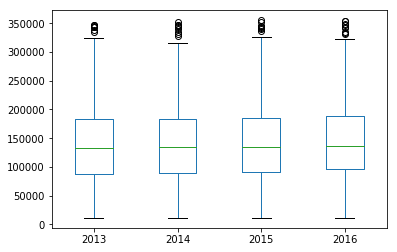

In [665]:
England_sub.groupby(['Geography','Age']).sum().plot(kind='box')
## Specific Aged people are more in number across england

In [653]:
England_sub.groupby(['Geography','Age']).sum()

2013    2014    2015    2016
Geography                Age                                
East Midlands            0    108124  105836  106738  107814
                         1    112920  109666  107626  108684
                         10    97912  102040  102974  109412
                         11    96712   98694  102884  103790
                         12    99946   97312   99436  103810
                         13   103422  100550   98006  100246
                         14   108740  104254  101510   99028
                         15   108478  109364  104976  102438
                         16   111416  109080  109940  105850
                         17   112196  112268  109758  110994
                         18   114932  115098  115494  112886
                         19   128222  125920  125934  128142
                         2    112576  114548  111456  109350
                         20   131504  132772  130726  131062
                         21   132248  130434  132926  130102
                         22   130748  129708  128280  130888
                         23   124456  127674  127292  126000
                         24   117354  122314  126488  126176
                         25   115536  117282  122206  126596
                         26   111166  115912  117610  122526
                         27   112640  111820  116778  118098
                         28   112496  113376  112458  117930
                         29   110592  113770  114658  113908
                         3    110702  113952  116242  113150
                         30   111300  111626  114622  115874
                         31   110522  112390  112640  115870
                         32   113732  111440  113502  113930
                         33   114618  114736  112268  115008
                         34   109654  115462  115462  113464
                         35   102010  110384  116452  116696
...                              ...     ...     ...     ...
Yorkshire and The Humber 64   123626  119464  116726  113822
                         65   131068  122560  118380  115556
                         66   142856  129764  121298  117200
                         67   108054  141282  128194  120082
                         68   105952  106510  139628  126666
                         69   104148  104512  105006  137664
                         7    127796  129302  133534  134410
                         70    95990  102454  103070  103458
                         71    85834   94346  100792  101268
                         72    78998   84064   92662   98950
                         73    82662   77314   82308   90666
                         74    81790   80748   75368   80210
                         75    80398   79600   78650   73358
                         76    76080   78118   77098   76440
                         77    72070   73514   75534   74448
                         78    68068   69500   70882   72772
                         79    63028   65332   66682   68024
                         8    122258  128154  129760  134082
                         80    58536   60300   62232   63578
                         81    55434   55650   57158   59092
                         82    52588   52274   52358   53796
                         83    48024   49134   48676   48808
                         84    43112   44496   45450   45228
                         85    38278   39458   40746   41716
                         86    34834   34802   35572   36928
                         87    30840   31332   31018   31948
                         88    26322   27410   27410   27292
                         89    22992   23018   23668   23830
                         9    119774  122754  128496  130252
                         90+   83688   87598   87642   89926

[819 rows x 4 columns]

In [ ]:
t_test_results_10=[]
for j in df['Geography'].unique():
    temp=df[(df['Geography']==j)]
    for i in df['Bin_Age'].unique():
        cat1 = temp[(temp['Sex']=='Female') & (temp['Bin_Age']==i)]['2016']
        y=len(cat1)
        cat2 = temp[(temp['Sex']=='Male') & (temp['Bin_Age']==i)]['2016']
        z=len(cat2)
        x=ttest_ind(cat1, cat2,equal_var=False)
        t_test_results_10.append((i,j,y,z,x[0],x[1]))
t_test_results_10=pd.DataFrame(t_test_results_10,columns=['Interval','Geography','sample_size_female','sample_size_male','T-Stat','P-Value'])

In [ ]:
## Outliers Here: We can hypothesis about which sub region in particular is abnormality for factor 'Age', as we already filtered Sex=All.
## We can also hypothesize whether female-male ratio is abnormal-- Leads us to Question 3

In [632]:
## Detecting the outliers Sub Regions in England
temp1=England_sub[(England_sub['Sex']=='All') ].groupby(['Geography']).sum()
temp2=temp1.apply(zscore)
temp2.columns=['Z(2013)','Z(2014)','Z(2015)','Z(2016)']
temp1=pd.merge(temp1,temp2,on='Geography')
temp1[(temp1['Z(2013)']>=3.) | (temp1['Z(2013)']<=-3.)][['2013','2014','2015','2016']].sort_values(by=['2013'],ascending=False)


,2013,2014,2015,2016
Geography,,,,


In [428]:
grouped_by_Geography_All=df[df['Sex']=='All'].groupby(['Geography']).sum()
grouped_by_Geography_All
temp=grouped_by_Geography_All.apply(zscore)
temp.columns=['Z(2013)','Z(2014)','Z(2015)','Z(2016)']
grouped_by_Geography_All=pd.merge(temp,grouped_by_Geography_All,on='Geography')
grouped_by_Geography_All.head(5)
#grouped_data_Geography=df[df['Sex']=='All'].groupby(['Geography','Sex']).sum()
## Detecting Outliers based on Z-Score
grouped_by_Geography_All[(grouped_by_Geography_All['Z(2016)']>=0.25) | (grouped_by_Geography_All['Z(2016)']<=-3)]
countries=grouped_by_Geography_All[(grouped_by_Geography_All['Z(2016)']>3.) | (grouped_by_Geography_All['Z(2016)']<-3)].index.tolist()

## Realization that these geographies are island nations and country

,Z(2013),Z(2014),Z(2015),Z(2016),2013,2014,2015,2016
Geography,,,,,,,,
Aberdeen City,-0.119480,-0.119449,-0.119501,-0.119905,227070,228920,230350,229840
Aberdeenshire,-0.114093,-0.113946,-0.114042,-0.114365,257770,260530,261960,262190
Adur,-0.148359,-0.148306,-0.148327,-0.148388,62505,63176,63429,63506
Allerdale,-0.142445,-0.142509,-0.142588,-0.142660,96208,96471,96660,96956
Amber Valley,-0.137656,-0.137726,-0.137855,-0.137918,123498,123942,124069,124645


In [477]:
'''
Great Britain = England, Scotland, and Wales
UK = England, Scotland, Wales, and Northern Ireland (and the full name is the “United Kingdom of Great Britain and Northern Ireland”)
England = Just the part of the island that is England
'''

'\nGreat Britain = England, Scotland, and Wales\nUK = England, Scotland, Wales, and Northern Ireland (and the full name is the “United Kingdom of Great Britain and Northern Ireland”)\nEngland = Just the part of the island that is England\n'

In [501]:
## Grouping Data by Geography and Finding Sum
grouped_data_Geography=df[df['Sex']=='All'].groupby(['Geography','Sex']).sum()

## Sorting the Data to answer Question 2
grouped_data_Geography.sort_values(by=['2013','2014','2015','2016'],ascending=True).head(1)
print("2013: Smallest Total Population:\n" + str(grouped_data_Geography.sort_values(by=['2013'],ascending=True).head(1)))
print("\n2014: Smallest Total Population:\n" + str(grouped_data_Geography.sort_values(by=['2014'],ascending=True).head(1)))
print("\n2015: Smallest Total Population:\n" + str(grouped_data_Geography.sort_values(by=['2015'],ascending=True).head(1)))
print("\n2016: Smallest Total Population:\n" + str(grouped_data_Geography.sort_values(by=['2016'],ascending=True).head(1)))
# Answer: Isles of Scilly


2013: Smallest Total Population:
                     2013  2014  2015  2016
Geography       Sex                        
Isles of Scilly All  2251  2280  2324  2308

2014: Smallest Total Population:
                     2013  2014  2015  2016
Geography       Sex                        
Isles of Scilly All  2251  2280  2324  2308

2015: Smallest Total Population:
                     2013  2014  2015  2016
Geography       Sex                        
Isles of Scilly All  2251  2280  2324  2308

2016: Smallest Total Population:
                     2013  2014  2015  2016
Geography       Sex                        
Isles of Scilly All  2251  2280  2324  2308


In [115]:
## Finding Female to Male Ratio -- Question 3
ratio_df=pd.DataFrame()
for i in grouped_data_Geography.keys():
    ratio_df[i]=df[df['Sex']=='Female'].groupby(['Geography']).sum()[i]/df[df['Sex']=='Male'].groupby(['Geography']).sum()[i]

In [120]:
## Highest Female to Male Ratio in 2013
ratio_df.sort_values('2013',ascending=False).head(1)
## 3.A Answer: Knowsley

,2013,2014,2015,2016
Geography,,,,
Knowsley,1.103591,1.1037,1.103751,1.099574


In [121]:
## 3.B  
ratio_df=ratio_df[['2013','2016']]
per_change_ratio=((ratio_df['2016']-ratio_df['2013'])/ratio_df['2013'])*100
print("Least Changed F-M Ratio Geography:\n" +str(per_change_ratio.sort_values().head(1)))
print("\nMost Changed F-M Ratio Geography:\n" +str(per_change_ratio.sort_values(ascending=False).head(1)))

Least Changed F-M Ratio Geography:
Geography
Moray   -6.224798
dtype: float64

Most Changed F-M Ratio Geography:
Geography
Inverclyde    4.720076
dtype: float64


In [124]:
from scipy.stats import ttest_ind

cat1 = df[(df['Geography']=='United Kingdom') & (df['Sex']=='Female')]['2016']
cat2 = df[(df['Geography']=='United Kingdom') & (df['Sex']=='Male')]['2016']

ttest_ind(cat1, cat2,equal_var=False)

## The Number of Females and Males are Statistically Same across UK for Year 2016
## Lets dive deep for each region

Ttest_indResult(statistic=0.6329326770795568, pvalue=0.5276013540864448)

In [125]:
t_test_results_Geography=[]
for j in df['Geography'].unique():
    temp=df[(df['Geography']==j)]
    cat1 = temp[(temp['Sex']=='Female')]['2016']
    y=len(cat1)
    cat2 = temp[(temp['Sex']=='Male')]['2016']
    z=len(cat2)
    x=ttest_ind(cat1, cat2,equal_var=False)
    t_test_results_Geography.append((j,y,z,float(x[0]),float(x[1])))
t_test_results_Geography=pd.DataFrame(t_test_results_Geography,columns=['Geography','sample_size_female','sample_size_male','T-Stat','P-Value'])
t_test_results_Geography[t_test_results_Geography['P-Value']<=0.05].sort_values(by=['P-Value'])
## The Male and Female Population is statistically different in the following regions:

,Geography,sample_size_female,sample_size_male,T-Stat,P-Value
295,Richmondshire,91,91,-3.054135,0.002678
78,City of London,91,91,-2.436554,0.015922
10,Arun,91,91,2.274498,0.024152
246,North Ayrshire,91,91,2.236269,0.026563
120,East Renfrewshire,91,91,2.219024,0.027752
323,South Ayrshire,91,91,2.166534,0.031586
410,West Dunbartonshire,91,91,2.051342,0.041693
199,Knowsley,91,91,2.038808,0.042941
313,Sefton,91,91,2.001867,0.046818


In [59]:
from statsmodels.stats.weightstats import ztest
z_test_results_Geography=[]
for j in df['Geography'].unique():
    temp=df[(df['Geography']==j)]
    cat1 = temp[(temp['Sex']=='Female')]['2016']
    y=len(cat1)
    cat2 = temp[(temp['Sex']=='Male')]['2016']
    z=len(cat2)
    x=ztest(cat1, cat2)
    z_test_results_Geography.append((j,y,z,float(x[0]),float(x[1])))
z_test_results_Geography=pd.DataFrame(z_test_results_Geography,columns=['Geography','sample_size_female','sample_size_male','Z-Stat','P-Value'])
z_test_results_Geography[z_test_results_Geography['P-Value']<=0.05].sort_values(by=['P-Value'])
## The Male and Female Population is statistically different in the following regions:

,Geography,sample_size_female,sample_size_male,Z-Stat,P-Value
295,Richmondshire,91,91,-3.054135,0.002257
78,City of London,91,91,-2.436554,0.014828
10,Arun,91,91,2.274498,0.022936
246,North Ayrshire,91,91,2.236269,0.025334
120,East Renfrewshire,91,91,2.219024,0.026485
323,South Ayrshire,91,91,2.166534,0.030270
410,West Dunbartonshire,91,91,2.051342,0.040234
199,Knowsley,91,91,2.038808,0.041469
313,Sefton,91,91,2.001867,0.045299


In [129]:
t_test_results=[]
for j in df['Geography'].unique():
    temp=df[(df['Geography']==j)]
    for i in df['Bin_Age'].unique():
        cat1 = temp[(temp['Sex']=='Female') & (temp['Bin_Age']==i)]['2016']
        y=len(cat1)
        cat2 = temp[(temp['Sex']=='Male') & (temp['Bin_Age']==i)]['2016']
        z=len(cat2)
        x=ttest_ind(cat1, cat2,equal_var=False)
        t_test_results.append((i,j,y,z,x[0],x[1]))
t_test_results=pd.DataFrame(t_test_results,columns=['Interval','Geography','sample_size_female','sample_size_male','T-Stat','P-Value'])

In [130]:
t_test_results=t_test_results[t_test_results['P-Value']<=0.05]
t_test_results.sort_values(by=['P-Value']).head(5)

,Interval,Geography,sample_size_female,sample_size_male,T-Stat,P-Value
471,75-79,Belfast,5,5,13.668925,0.000001
2846,75-79,Glasgow City,5,5,11.619641,0.000003
5609,25-29,Richmondshire,5,5,-11.985153,0.000004
155,20-24,Argyll and Bute,5,5,-12.203315,0.000004
8318,75-79,York,5,5,10.627156,0.000006


In [133]:
temp=df[(df['Geography']=='Richmondshire') & (df['Bin_Age']=='25-29')]
temp.groupby(['Geography','Sex']).sum()

2013  2014  2015  2016
Geography     Sex                           
Richmondshire All     4244  4168  4033  4442
              Female  1449  1439  1336  1367
              Male    2795  2729  2697  3075

In [98]:
t_test_results.sort_values(by=['P-Value']).head(5)

,Interval,Geography,sample_size_female,sample_size_male,T-Stat,P-Value
471,75-79,Belfast,5,5,13.668925,0.000001
2846,75-79,Glasgow City,5,5,11.619641,0.000003
5609,25-29,Richmondshire,5,5,-11.985153,0.000004
155,20-24,Argyll and Bute,5,5,-12.203315,0.000004
8318,75-79,York,5,5,10.627156,0.000006


In [99]:
t_test_results_Geography.sort_values(by=['P-Value']).head(5)

,Geography,sample_size_female,sample_size_male,T-Stat,P-Value
295,Richmondshire,91,91,-3.054135,0.002678
78,City of London,91,91,-2.436554,0.015922
10,Arun,91,91,2.274498,0.024152
246,North Ayrshire,91,91,2.236269,0.026563
120,East Renfrewshire,91,91,2.219024,0.027752


In [140]:
a=pd.DataFrame()
for i in t_test_results_Geography[t_test_results_Geography['P-Value']<=0.05]['Geography'].unique():
    
    a=a.append(t_test_results[t_test_results['Geography']==i], ignore_index=True)
    

In [143]:
t_test_results_Geography

,Geography,sample_size_female,sample_size_male,T-Stat,P-Value
0,Aberdeen City,91,91,0.209231,0.834510
1,Aberdeenshire,91,91,0.233921,0.815314
2,Adur,91,91,1.385958,0.167477
3,Allerdale,91,91,0.626115,0.532035
4,Amber Valley,91,91,0.801685,0.423804
5,Angus,91,91,1.253328,0.211723
6,Antrim and Newtownabbey,91,91,1.206398,0.229268
7,Ards and North Down,91,91,1.467383,0.144028
8,Argyll and Bute,91,91,0.243486,0.807907
9,"Armagh City, Banbridge and Craigavon",91,91,0.299893,0.764612


In [144]:
## Bining The "Age" in bins of Size (0-14) both Inclusive
df["Bin_Age"]=df["Age"]
bins = range(0,95,15)
labels=[str(bins[i])+'-'+str(bins[i+1]-1) for i in range(len(bins)-1)]
labels.append('90-inf')
df.Bin_Age=df.Bin_Age.replace('90+',91)
df.Bin_Age=df.Bin_Age.astype('int32')
df['Bin_Age'] = pd.cut(df['Bin_Age'],right=False,labels=labels,bins=np.r_[bins, np.inf])

In [146]:
t_test_results_10=[]
for j in df['Geography'].unique():
    temp=df[(df['Geography']==j)]
    for i in df['Bin_Age'].unique():
        cat1 = temp[(temp['Sex']=='Female') & (temp['Bin_Age']==i)]['2016']
        y=len(cat1)
        cat2 = temp[(temp['Sex']=='Male') & (temp['Bin_Age']==i)]['2016']
        z=len(cat2)
        x=ttest_ind(cat1, cat2,equal_var=False)
        t_test_results_10.append((i,j,y,z,x[0],x[1]))
t_test_results_10=pd.DataFrame(t_test_results_10,columns=['Interval','Geography','sample_size_female','sample_size_male','T-Stat','P-Value'])

C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [148]:
t_test_results_10[t_test_results_10['P-Value']<=0.05]

,Interval,Geography,sample_size_female,sample_size_male,T-Stat,P-Value
5,75-89,Aberdeen City,15,15,3.550946,1.382147e-03
7,0-14,Aberdeenshire,15,15,-2.291726,2.975055e-02
8,15-29,Aberdeenshire,15,15,-3.980353,4.922560e-04
14,0-14,Adur,15,15,-2.406993,2.336413e-02
15,15-29,Adur,15,15,-2.122338,4.279133e-02
16,30-44,Adur,15,15,2.537554,1.712174e-02
18,60-74,Adur,15,15,2.411879,2.442098e-02
19,75-89,Adur,15,15,2.561488,1.615655e-02
22,15-29,Allerdale,15,15,-3.391214,2.117180e-03
28,0-14,Amber Valley,15,15,-2.703434,1.156936e-02


In [152]:
## Bining The "Age" in bins of Size (0-14) both Inclusive
df["Bin_Age"]=df["Age"]
bins = range(0,100,65)
labels=[str(bins[i])+'-'+str(bins[i+1]-1) for i in range(len(bins)-1)]
labels.append('65-inf')
df.Bin_Age=df.Bin_Age.replace('90+',91)
df.Bin_Age=df.Bin_Age.astype('int32')
df['Bin_Age'] = pd.cut(df['Bin_Age'],right=False,labels=labels,bins=np.r_[bins, np.inf])

In [197]:
over_65_by_under_65=df[(df['Bin_Age']!='0-64') & (df['Sex']=='All') ].groupby(['Geography','Sex']).sum()/df[(df['Bin_Age']=='0-64') & (df['Sex']=='All')  ].groupby(['Geography','Sex']).sum()

In [213]:
over_65_by_under_65_female=df[(df['Bin_Age']!='0-64') & (df['Sex']=='Female') ].groupby(['Geography','Sex']).sum()/df[(df['Bin_Age']=='0-64') & (df['Sex']=='Female')  ].groupby(['Geography','Sex']).sum()
over_65_by_under_65_male=df[(df['Bin_Age']!='0-64') & (df['Sex']=='Male') ].groupby(['Geography','Sex']).sum()/df[(df['Bin_Age']=='0-64') & (df['Sex']=='Male')  ].groupby(['Geography','Sex']).sum()

In [231]:
from scipy.stats import zscore
z_scores=over_65_by_under_65.apply(zscore).sort_values(by=['2013','2014','2015','2016'])


In [241]:
low_65=z_scores[z_scores['2016']<=-2.0]
high_65=z_scores[z_scores['2016']>=2.0]


In [242]:
high_65

,,2013,2014,2015,2016
Geography,Sex,,,,
New Forest,All,2.101672,2.072713,2.067316,2.090104
Dorset,All,2.161312,2.160462,2.160576,2.153124
Arun,All,2.358151,2.317552,2.245556,2.184080
East Lindsey,All,2.429057,2.398415,2.424609,2.442973
West Dorset,All,2.520970,2.538096,2.579464,2.588002
Tendring,All,2.682949,2.628065,2.577715,2.479803
East Devon,All,2.924929,2.815759,2.711853,2.619173
East Dorset,All,3.064935,3.030557,2.976078,2.943770
Rother,All,3.224835,3.168224,3.104668,3.078311


In [243]:
low_65

,,2013,2014,2015,2016
Geography,Sex,,,,
Tower Hamlets,All,-2.653315,-2.653519,-2.632742,-2.613922
Newham,All,-2.511029,-2.490732,-2.456066,-2.425402
Hackney,All,-2.465799,-2.451540,-2.430253,-2.403161
Lambeth,All,-2.355929,-2.343049,-2.321985,-2.305455
Southwark,All,-2.327588,-2.317277,-2.300257,-2.277126
Islington,All,-2.135047,-2.144409,-2.150563,-2.145800
Haringey,All,-2.105858,-2.082183,-2.063943,-2.050804
Wandsworth,All,-2.094430,-2.079303,-2.055891,-2.031323
Lewisham,All,-2.021289,-2.051777,-2.059490,-2.055629


In [246]:
## 3.B  
over_65_by_under_65=over_65_by_under_65[['2013','2016']]
per_65_change_ratio=((over_65_by_under_65['2016']-over_65_by_under_65['2013'])/over_65_by_under_65['2013'])*100
print("Least Changed 0ver65/under65  Ratio Geography:\n" +str(per_65_change_ratio.sort_values().head(1)))
print("\nMost Changed 0ver65/under65 Ratio Geography:\n" +str(per_65_change_ratio.sort_values(ascending=False).head(1)))

Least Changed 0ver65/under65  Ratio Geography:
Geography  Sex
Cardiff    All   -33.794459
dtype: float64

Most Changed 0ver65/under65 Ratio Geography:
Geography  Sex
Highland   All    67.286117
dtype: float64


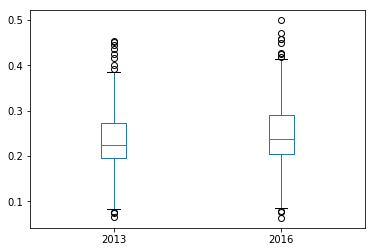

In [252]:
over_65_by_under_65.plot(kind='box')


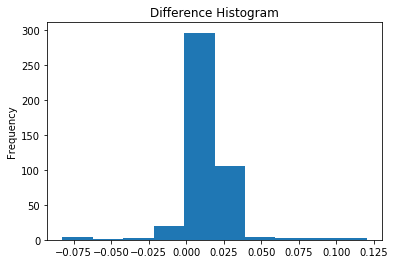

In [253]:
over_65_by_under_65['difference']=over_65_by_under_65['2016']-over_65_by_under_65['2013']
over_65_by_under_65['difference'].plot(kind='hist', title= 'Difference Histogram')

## Outliers are present: Nothing but Aggregrated Countries: UK, Great Britian and So on

((array([-2.95218343, -2.66675359, -2.50599299, -2.39186891, -2.30236047,
         -2.22820458, -2.16459258, -2.10869492, -2.0587004 , -2.01337711,
         -1.97184769, -1.93346436, -1.89773467, -1.8642752 , -1.83278136,
         -1.803007  , -1.77475022, -1.74784331, -1.72214537, -1.69753685,
         -1.67391536, -1.65119257, -1.6292917 , -1.60814554, -1.58769497,
         -1.56788765, -1.54867703, -1.53002152, -1.5118838 , -1.49423024,
         -1.47703045, -1.46025684, -1.4438843 , -1.42788992, -1.41225269,
         -1.39695337, -1.38197422, -1.36729888, -1.35291225, -1.33880031,
         -1.32495006, -1.31134942, -1.29798712, -1.28485263, -1.27193614,
         -1.25922843, -1.24672089, -1.23440539, -1.22227432, -1.21032051,
         -1.19853719, -1.18691797, -1.17545682, -1.16414803, -1.1529862 ,
         -1.14196619, -1.13108315, -1.12033244, -1.10970969, -1.09921071,
         -1.08883151, -1.07856831, -1.06841747, -1.05837554, -1.04843923,
         -1.03860536, -1.02887092, -1.

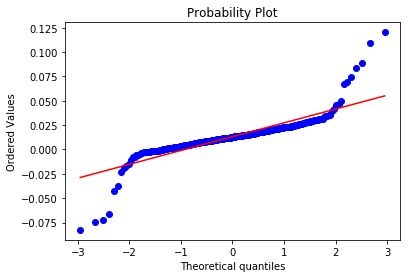

In [256]:
from scipy import stats
stats.probplot(over_65_by_under_65['difference'], plot= plt)

In [257]:
stats.ttest_rel(over_65_by_under_65['2013'], over_65_by_under_65['2016'])

Ttest_relResult(statistic=-16.853686483411934, pvalue=1.7340428288082036e-49)

In [260]:
df.describe()

,2013,2014,2015,2016
count,120120.000000,120120.000000,120120.000000,120120.000000
mean,6636.276057,6687.961122,6741.755261,6798.140909
std,46218.249761,46527.075036,46868.299221,47215.326790
min,0.000000,2.000000,0.000000,0.000000
25%,580.000000,585.000000,589.000000,594.000000
50%,978.000000,986.000000,995.000000,1003.000000
75%,1879.000000,1893.000000,1905.000000,1921.000000
max,946543.000000,946383.000000,946132.000000,945494.000000


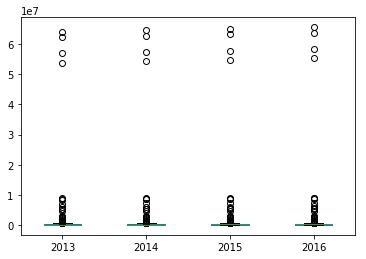

In [296]:
grouped_data_Geography.sort_values(by=['2013'],ascending=False).plot(kind='box')

In [312]:
from scipy.stats import zscore
grouped_df_z_scores=grouped_data_Geography.apply(zscore).sort_values(by=['2013','2014','2015','2016'])
grouped_df_z_scores.columns=['Z(2013)','Z(2014)','Z(2015)','Z(2016)']


In [318]:
coupled_countries=grouped_df_z_scores[(grouped_df_z_scores['Z(2016)']>3.0)| (grouped_df_z_scores['Z(2016)']<-3.0)].index.tolist()
#coupled_countries=[i[0] for i in coupled_countries]
#coupled_countries

In [319]:
coupled_countries

[('England', 'All'),
 ('England and Wales', 'All'),
 ('Great Britain', 'All'),
 ('United Kingdom', 'All')]

In [320]:
Z_scores_grouped_data=pd.merge(grouped_df_z_scores,grouped_data_Geography,on=grouped_df_z_scores.index)

In [325]:
Z_scores_grouped_data[Z_scores_grouped_data.key_0.isin(coupled_countries)]

,key_0,Z(2013),Z(2014),Z(2015),Z(2016),2013,2014,2015,2016
435,"(England, All)",9.293473,9.297606,9.301799,9.304782,108236,108742,109745,110261
436,"(England and Wales, All)",9.834399,9.835952,9.836982,9.837875,98421,98960,99503,99902
437,"(Great Britain, All)",10.769347,10.767007,10.764848,10.763370,202435,204439,206856,208367
438,"(United Kingdom, All)",11.090441,11.087451,11.084605,11.082240,5337711,5360027,5390576,5425741


In [329]:
grouped_df_z_scores.sort_values('Z(2013)',ascending=False)

,,Z(2013),Z(2014),Z(2015),Z(2016)
Geography,Sex,,,,
United Kingdom,All,11.090441,11.087451,11.084605,11.082240
Great Britain,All,10.769347,10.767007,10.764848,10.763370
England and Wales,All,9.834399,9.835952,9.836982,9.837875
England,All,9.293473,9.297606,9.301799,9.304782
South East,All,1.383696,1.385690,1.385939,1.386391
West Midlands,All,1.324982,1.324373,1.323191,1.324636
London,All,1.317674,1.327341,1.338588,1.345567
North West,All,1.087209,1.082599,1.079573,1.077018
East of England,All,0.885583,0.888538,0.890065,0.890525


,key_0,Z(2013),Z(2014),Z(2015),Z(2016),2013,2014,2015,2016
0,"(Isles of Scilly, All)",-0.158933,-0.158909,-0.158879,-0.158867,227070,228920,230350,229840
1,"(City of London, All)",-0.157986,-0.157900,-0.157768,-0.157653,257770,260530,261960,262190
2,"(Orkney Islands, All)",-0.155545,-0.155548,-0.155538,-0.155521,62505,63176,63429,63506
3,"(Shetland Islands, All)",-0.155257,-0.155263,-0.155274,-0.155290,96208,96471,96660,96956
4,"(Falkirk, All)",-0.154520,-0.154561,-0.131916,-0.131970,123498,123942,124069,124645
5,"(West Somerset, All)",-0.153305,-0.153330,-0.153339,-0.153388,116290,116740,116900,116520
6,"(Rutland, All)",-0.152729,-0.152686,-0.152710,-0.152652,139536,139966,140467,141032
7,"(Purbeck, All)",-0.151359,-0.151353,-0.151300,-0.151328,157640,205711,158797,159593
8,"(Christchurch, All)",-0.150840,-0.150793,-0.150809,-0.150789,88050,87650,86890,87130
9,"(Melton, All)",-0.150407,-0.150432,-0.150488,-0.150550,203757,336830,207797,210260
